In [1]:
import coffea
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use(hep.style.CMS)
import os

# Analyzing coffea output

In [2]:
from coffea.util import load

In [68]:
results_dir = "output_v12"
df = load(f"{results_dir}/output_ttHTobb_Run3.coffea")

In [69]:
df["cutflow"]

{'initial': {'ttHTobb_Run3': 2542150},
 'skim': {'ttHTobb_Run3': 369684},
 'presel': {'ttHTobb_Run3': 369684},
 'semilep': {'ttHTobb_Run3': {'ttHTobb': 369684}},
 'semilep_Ele28': {'ttHTobb_Run3': {'ttHTobb': 172428}},
 'semilep_Ele30': {'ttHTobb_Run3': {'ttHTobb': 173578}},
 'semilep_Ele32': {'ttHTobb_Run3': {'ttHTobb': 168138}},
 'semilep_tripleB_Ele30': {'ttHTobb_Run3': {'ttHTobb': 247880}},
 'semilep_doubleB_tighter_Ele30': {'ttHTobb_Run3': {'ttHTobb': 274582}},
 'semilep_doubleB_looser_Ele30': {'ttHTobb_Run3': {'ttHTobb': 313354}},
 'semilep_tripleB': {'ttHTobb_Run3': {'ttHTobb': 148827}},
 'semilep_doubleB_tighter': {'ttHTobb_Run3': {'ttHTobb': 203416}},
 'semilep_doubleB_looser': {'ttHTobb_Run3': {'ttHTobb': 278226}},
 'semilep_4j': {'ttHTobb_Run3': {'ttHTobb': 366796}},
 'semilep_4j_Ele28': {'ttHTobb_Run3': {'ttHTobb': 171648}},
 'semilep_4j_Ele30': {'ttHTobb_Run3': {'ttHTobb': 172765}},
 'semilep_4j_Ele32': {'ttHTobb_Run3': {'ttHTobb': 167355}},
 'semilep_4j_tripleB_Ele30': {'

In [70]:
cats = list(filter(lambda k: "semilep_recoele15" in k , df["cutflow"].keys(), ))
cats

['semilep_recoele15tight',
 'semilep_recoele15tight_Ele28',
 'semilep_recoele15tight_Ele30',
 'semilep_recoele15tight_Ele32',
 'semilep_recoele15tight_tripleB_Ele30',
 'semilep_recoele15tight_doubleB_tighter_Ele30',
 'semilep_recoele15tight_doubleB_looser_Ele30',
 'semilep_recoele15tight_tripleB',
 'semilep_recoele15tight_doubleB_tighter',
 'semilep_recoele15tight_doubleB_looser']

In [71]:
effs = {}
for c in cats[1:]:
    effs[c] = df["sumw"][c]["ttHTobb_Run3"]["ttHTobb"] /df["sumw"][cats[0]]["ttHTobb_Run3"]["ttHTobb"]  
    
for cat, e in effs.items():
    print(f"{cat.replace('semilep_recoele15tight_','')} --> {e*100:.3f}%")

Ele28 --> 71.652%
Ele30 --> 71.635%
Ele32 --> 69.422%
tripleB_Ele30 --> 82.241%
doubleB_tighter_Ele30 --> 86.505%
doubleB_looser_Ele30 --> 92.377%
tripleB --> 41.064%
doubleB_tighter --> 57.009%
doubleB_looser --> 77.838%


In [63]:
df["sumw"]

{'semilep': {'ttHTobb_Run3': {'ttHTobb': 2147.440963807504}},
 'semilep_Ele28': {'ttHTobb_Run3': {'ttHTobb': 999.9474421397451}},
 'semilep_Ele30': {'ttHTobb_Run3': {'ttHTobb': 1006.3015556829704}},
 'semilep_Ele32': {'ttHTobb_Run3': {'ttHTobb': 974.4953574236113}},
 'semilep_tripleB_Ele30': {'ttHTobb_Run3': {'ttHTobb': 1436.2909514192827}},
 'semilep_doubleB_tighter_Ele30': {'ttHTobb_Run3': {'ttHTobb': 1591.2600607875127}},
 'semilep_doubleB_looser_Ele30': {'ttHTobb_Run3': {'ttHTobb': 1817.5852714037744}},
 'semilep_tripleB': {'ttHTobb_Run3': {'ttHTobb': 859.8897151145419}},
 'semilep_doubleB_tighter': {'ttHTobb_Run3': {'ttHTobb': 1176.3780153820092}},
 'semilep_doubleB_looser': {'ttHTobb_Run3': {'ttHTobb': 1612.4958645544034}},
 'semilep_4j': {'ttHTobb_Run3': {'ttHTobb': 2130.4927020763207}},
 'semilep_4j_Ele28': {'ttHTobb_Run3': {'ttHTobb': 995.3629789104272}},
 'semilep_4j_Ele30': {'ttHTobb_Run3': {'ttHTobb': 1001.5211244658709}},
 'semilep_4j_Ele32': {'ttHTobb_Run3': {'ttHTobb': 9

In [64]:
df["variables"]

{'higgs_pt': defaultdict(dict,
             {'ttHTobb': {'ttHTobb_Run3': Hist(
                 StrCategory(['semilep', 'semilep_4j', 'semilep_4j_Ele28', 'semilep_4j_Ele30', 'semilep_4j_Ele32', 'semilep_4j_doubleB_looser', 'semilep_4j_doubleB_looser_Ele30', 'semilep_4j_doubleB_tighter', 'semilep_4j_doubleB_tighter_Ele30', 'semilep_4j_tripleB', 'semilep_4j_tripleB_Ele30', 'semilep_Ele28', 'semilep_Ele30', 'semilep_Ele32', 'semilep_doubleB_looser', 'semilep_doubleB_looser_Ele30', 'semilep_doubleB_tighter', 'semilep_doubleB_tighter_Ele30', 'semilep_recoele15tight', 'semilep_recoele15tight_Ele28', 'semilep_recoele15tight_Ele30', 'semilep_recoele15tight_Ele32', 'semilep_recoele15tight_doubleB_looser', 'semilep_recoele15tight_doubleB_looser_Ele30', 'semilep_recoele15tight_doubleB_tighter', 'semilep_recoele15tight_doubleB_tighter_Ele30', 'semilep_recoele15tight_tripleB', 'semilep_recoele15tight_tripleB_Ele30', 'semilep_tripleB', 'semilep_tripleB_Ele30'], name='cat', label='Category'),
       

In [49]:
def hist_comparison_2(Hs, cats, labels, file,  yratio_lim=[0,1],ylog=False, output_folder=None, ):
    # os.makedirs(output_folder, exist_ok=True)
    # os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
    
    fig = plt.figure(figsize=(8,9), dpi=100)
    gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.05, height_ratios=[0.55,0.45])
    axs = gs.subplots(sharex=True)
    plt.subplots_adjust(wspace=0.3)
    
    axu =  axs[0]
    axd =  axs[1]

    
    for i, (cat, label) in  enumerate(zip(cats, labels)):
        if i == 0:
            hep.histplot(Hs[cat, "nominal", :], label=label, ax=axu, color="black")
        else:
            hep.histplot(Hs[cat, "nominal", :], label=label, ax=axu)
        
    if ylog:
        axu.set_yscale("log")
    axu.legend(fontsize=16)
    axu.set_xlabel('')
    axu.set_ylabel('Events')
    hep.plot.ylow(axu)
    hep.plot.yscale_legend(axu)

    # Ratios
    nom = Hs[cats[0], "nominal",:]
    nomvalues = nom.values()
    nom_sig2 = nom.variances()
    centers = nom.axes[0].centers
    edges = nom.axes[0].edges
    minratio, maxratio = 1000.,0.
    for i,cat in enumerate(cats):
        h = Hs[cat, "nominal",:]
        h_val = h.values()
        h_sig2 = h.variances()
        
        err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
        r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
        m, M = np.min(r), np.max(r)
        if m < minratio: minratio = m
        if M > maxratio: maxratio = M
        
        if i == 0:
            axd.errorbar(centers, r, xerr=0, yerr=err,
                     fmt=".", linestyle='none', elinewidth=1, color="black")
        else:
            axd.errorbar(centers, r, xerr=0, yerr=err,
                     fmt=".", linestyle='none', elinewidth=1)
       
    axd.legend(ncol=3, fontsize='xx-small')
    hep.plot.yscale_legend(axd)
    axd.set_xlabel(nom.axes[0].label)
    axd.set_ylim(*yratio_lim)
    axd.set_ylabel("efficiency")
    axd.grid(which="both",axis="y")
    
    hep.cms.label(rlabel="50/fb (13.6 TeV)", loc=0, ax=axu) 
    
    if output_folder: 
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(f"{output_folder}/{file}.png")
        fig.savefig(f"{output_folder}/{file}.pdf")
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


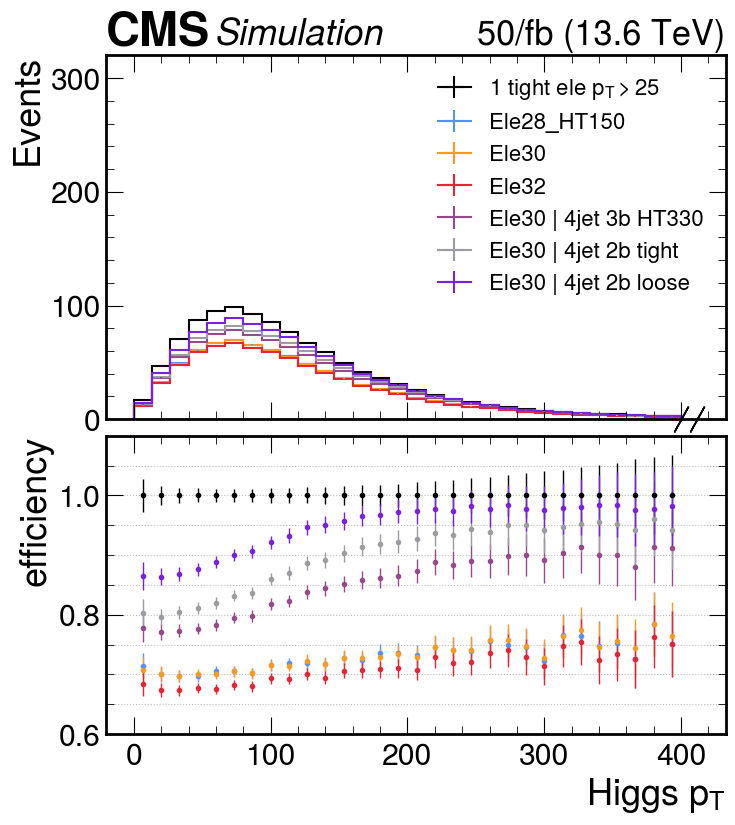

In [50]:
hist_comparison_2(df["variables"]["higgs_pt"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_higgs_pt", 
                  yratio_lim=[0.6,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in multiply
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:41: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encoun

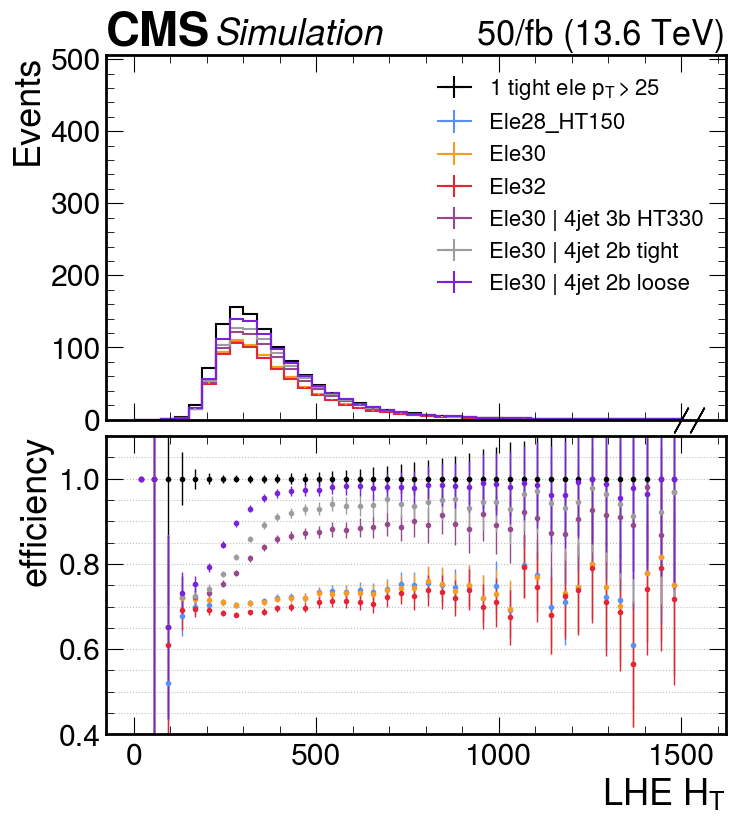

In [67]:
hist_comparison_2(df["variables"]["HT"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_lheHT", 
                  yratio_lim=[0.4,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in multiply
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:41: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encoun

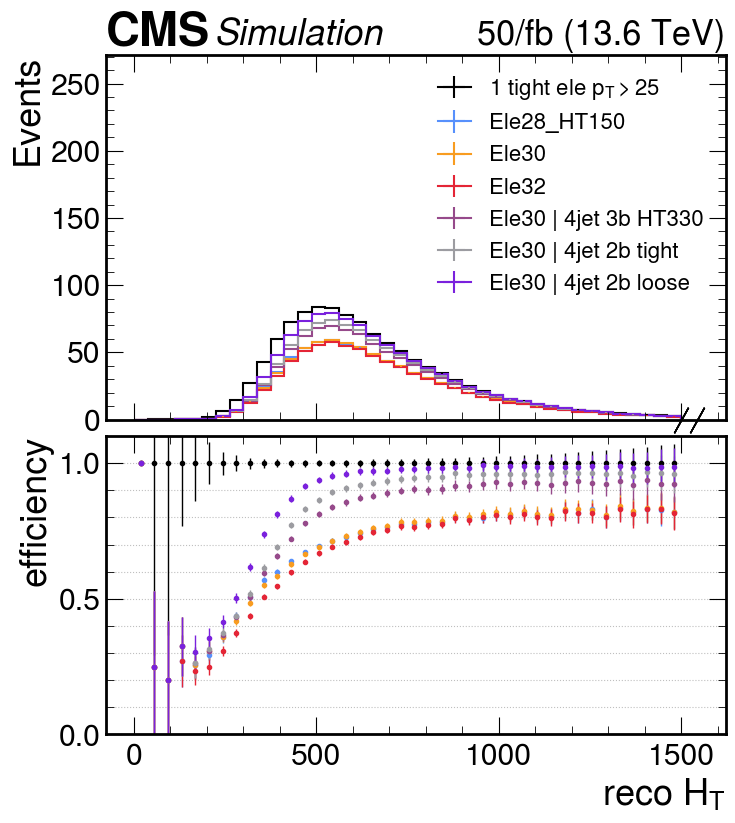

In [73]:
hist_comparison_2(df["variables"]["recoHT"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_HT_reco", 
                  yratio_lim=[0.0,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in multiply
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:41: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encoun

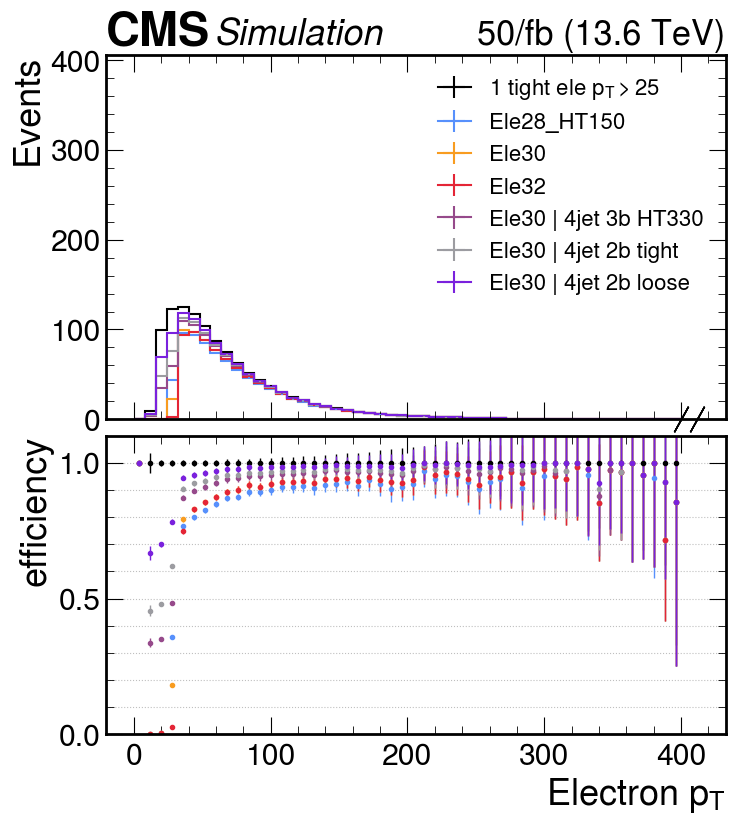

In [52]:
hist_comparison_2(df["variables"]["ElectronGood_pt"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_electron_pt", 
                  yratio_lim=[0.0,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in multiply
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:41: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encoun

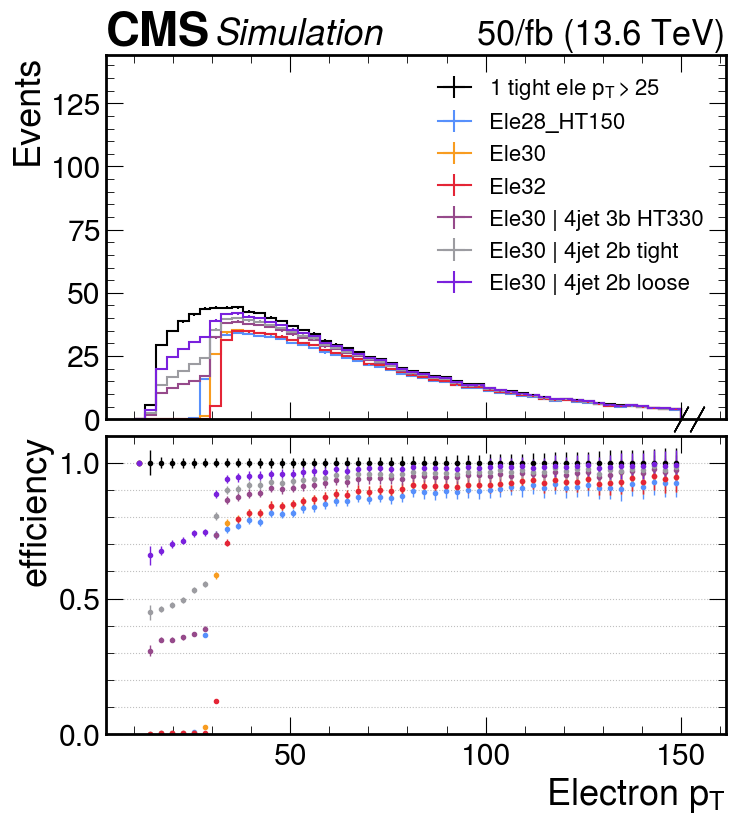

In [53]:
hist_comparison_2(df["variables"]["ElectronGood_pt2"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_electron_pt2", 
                  yratio_lim=[0.0,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in multiply
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:41: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_2383335/2829084831.py:40: RuntimeWarning: invalid value encoun

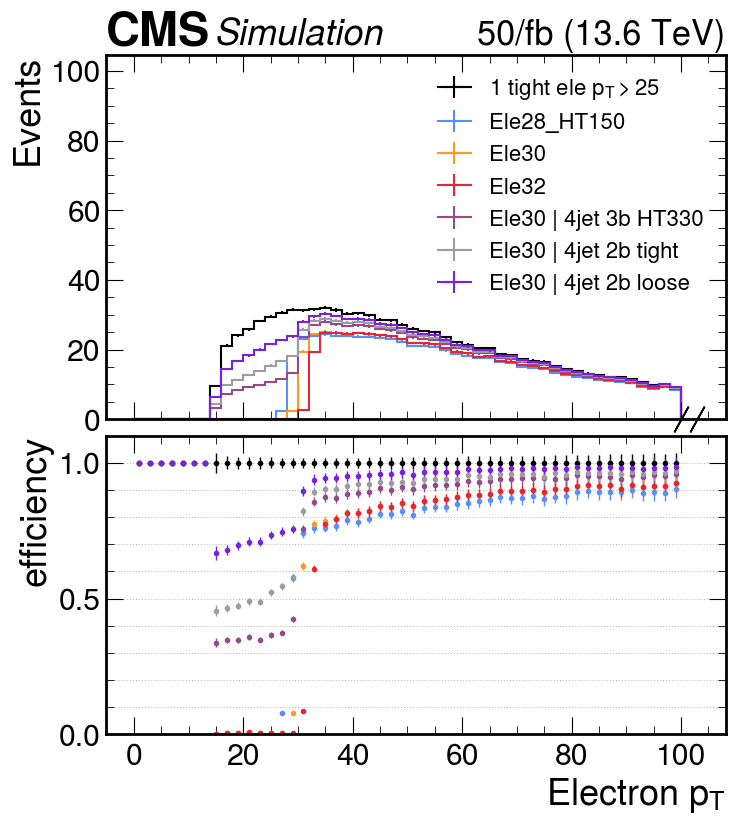

In [54]:
hist_comparison_2(df["variables"]["ElectronGood_pt3"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_electron_pt3", 
                  yratio_lim=[0.0,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


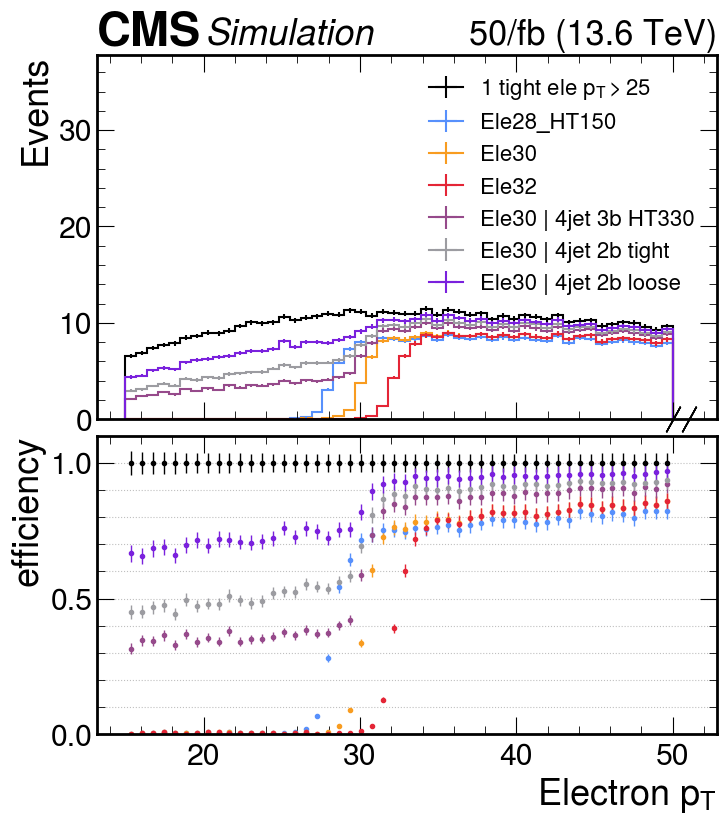

In [57]:
hist_comparison_2(df["variables"]["ElectronGood_pt4"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_electron_pt4", 
                  yratio_lim=[0.0,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


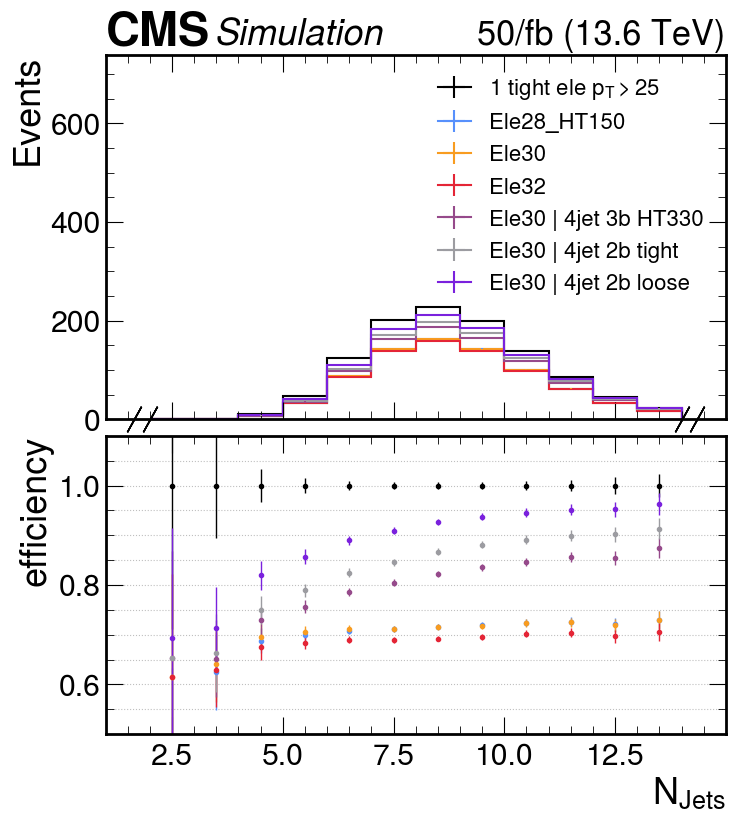

In [55]:
hist_comparison_2(df["variables"]["nJets"]["ttHTobb"]["ttHTobb_Run3"], 
                ['semilep_recoele15tight', 'semilep_recoele15tight_Ele28','semilep_recoele15tight_Ele30', 
                 'semilep_recoele15tight_Ele32',"semilep_recoele15tight_tripleB_Ele30", 
                 "semilep_recoele15tight_doubleB_tighter_Ele30",
                "semilep_recoele15tight_doubleB_looser_Ele30"],
                 labels=["1 tight ele $p_T>25$", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 | 4jet 2b tight", "Ele30 | 4jet 2b loose"],
                  file="semilep_nJets", 
                  yratio_lim=[0.5,1.1],
                 output_folder="/eos/user/d/dvalsecc/www/ttHbbPlots/triggers_run3_leptons_tests")